# Fashion Data Exploration

Dieses Notebook führt eine Basisanalyse der bereitgestellten Fashion-Datensätze (DeepFashion, ModaNet, Fashion-MNIST) durch. Die Kernfunktionen werden in .py-Dateien ausgelagert und im Notebook verwendet.

In [1]:
import os

# Neuen Ordner für das Projekt anlegen (falls nicht vorhanden)
project_dir = '../project_analysis'
os.makedirs(project_dir, exist_ok=True)
print(f"Projektordner '{project_dir}' ist bereit.")

Projektordner '../project_analysis' ist bereit.


## Das Notebook ist im neuen Ordner gespeichert

Dieses Notebook befindet sich im Ordner `notebooks/` und nutzt für Analysen den Ordner `project_analysis/`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import json
import gzip

## Basisanalyse der Fashion-Daten

Im Folgenden werden die Datensätze DeepFashion, ModaNet und Fashion-MNIST exemplarisch geladen und analysiert.

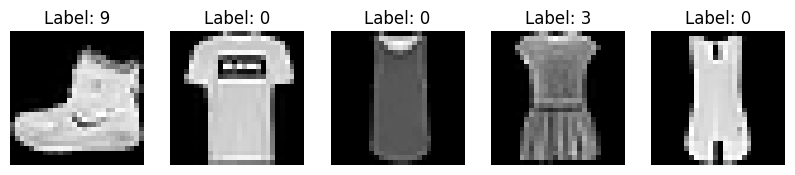

In [5]:
# Beispiel: Fashion-MNIST laden und ein paar Bilder anzeigen
def load_mnist_images_labels(images_path, labels_path, num=5):
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(-1, 28, 28)
    return images[:num], labels[:num]

mnist_images_path = '../data/zelando/train-images-idx3-ubyte.gz'
mnist_labels_path = '../data/zelando/train-labels-idx1-ubyte.gz'

images, labels = load_mnist_images_labels(mnist_images_path, mnist_labels_path, num=5)

fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')
plt.show()

In [ ]:
# Beispiel: DeepFashion Metadaten laden und Bildpfade anzeigen
with open('../data/DeepFashion/captions.json', 'r') as f:
    captions = json.load(f)

# Zeige die ersten 3 Einträge
for i, (img, meta) in enumerate(list(captions.items())[:3]):
    print(f"Bild: {img}\nBeschreibung: {meta}\n")

Bild: MEN-Denim-id_00000080-01_7_additional.jpg
Beschreibung: The lower clothing is of long length. The fabric is cotton and it has plaid patterns.

Bild: MEN-Denim-id_00000089-01_7_additional.jpg
Beschreibung: His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.

Bild: MEN-Denim-id_00000089-02_7_additional.jpg
Beschreibung: His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.



In [7]:
# Beispiel: ModaNet-Annotationen laden und analysieren
with open('../data/modanet/modanet2018_instances_train.json', 'r') as f:
    modanet_train = json.load(f)

# Zeige die ersten 2 Annotationen
for i, ann in enumerate(modanet_train['annotations'][:2]):
    print(f"Bild-ID: {ann['image_id']}")
    print(f"Kategorien: {ann['category_id']}")
    print(f"Segmente: {ann['segmentation'][:1]}\n")

Bild-ID: 736791
Kategorien: 2
Segmente: [[161, 248, 170, 248, 173, 249, 189, 251, 199, 252, 199, 250, 212, 250, 212, 252, 224, 253, 239, 251, 248, 250, 257, 247, 257, 253, 249, 255, 248, 260, 248, 265, 228, 264, 215, 264, 200, 264, 196, 261, 189, 260, 182, 259, 171, 259, 164, 255, 160, 254, 161, 254]]

Bild-ID: 736791
Kategorien: 4
Segmente: [[198, 543, 197, 551, 198, 556, 199, 565, 200, 573, 205, 579, 210, 585, 217, 585, 224, 584, 227, 582, 226, 567, 226, 562, 223, 565, 217, 567, 211, 569, 206, 568, 200, 563, 200, 552, 199, 546]]



## Auslagerung von Kernfunktionen

Die wichtigsten Analysefunktionen wurden in die Datei `project_analysis/data_utils.py` ausgelagert.

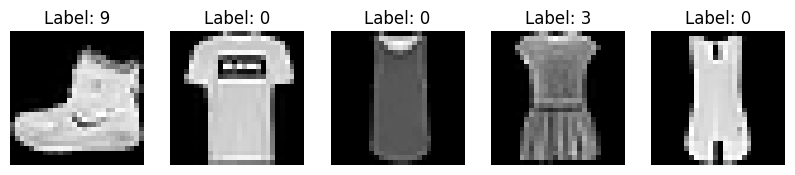

Bild: MEN-Denim-id_00000080-01_7_additional.jpg
Beschreibung: The lower clothing is of long length. The fabric is cotton and it has plaid patterns.

Bild: MEN-Denim-id_00000089-01_7_additional.jpg
Beschreibung: His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.

Bild: MEN-Denim-id_00000089-02_7_additional.jpg
Beschreibung: His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.

Bild-ID: 736791
Kategorien: 2
Segmente: [[161, 248, 170, 248, 173, 249, 189, 251, 199, 252, 199, 250, 212, 250, 212, 252, 224, 253, 239, 251, 248, 250, 257, 247, 257, 253, 249, 255, 248, 260, 248, 265, 228, 264, 215, 264, 200, 264, 196, 261, 189, 260, 182, 259, 171, 259, 164, 255, 160, 254, 161, 254]]

Bild-ID: 736791
Kategorien: 4


In [8]:
import sys
sys.path.append('../project_analysis')
from data_utils import load_mnist_images_labels, show_mnist_images, show_deepfashion_captions, show_modanet_annotations

# Beispielaufrufe
images, labels = load_mnist_images_labels('../data/zelando/train-images-idx3-ubyte.gz', '../data/zelando/train-labels-idx1-ubyte.gz', num=5)
show_mnist_images(images, labels)

show_deepfashion_captions('../data/DeepFashion/captions.json', n=3)

show_modanet_annotations('../data/modanet/modanet2018_instances_train.json', n=2)